⚡Let us perform multiclass classification using using open source cifar 10 dataset

⭐ Let us move on with a proper procedure

In [26]:
# First let us import baisc necessary libraries to operate with tensors

import tensorflow as tf 
import matplotlib.pyplot as plt

In [27]:
# Now we need to import the datasets

from tensorflow.keras.datasets import cifar10

In [28]:
# As per the documentation the Training and Testing samples are splitted
 
(train_data , train_labels) , (test_data , test_labels) = cifar10.load_data()

In [29]:
# As per the documentation the class names are ordered and labeled

class_names = ['airplane' , 'automobile' , 'bird' , 'cat' , 'deer' , 'dog' , 'frog' , 'horse' , 'ship' , 'truck']

Text(0.5, 1.0, 'bird')

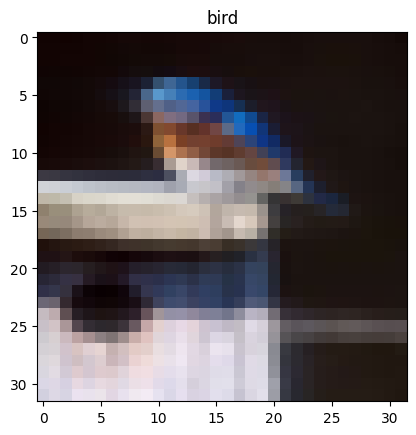

In [30]:
# Had a glance at the random images

index = 13
plt.imshow(train_data[index] , cmap = plt.cm.binary)
plt.title(class_names[train_labels[index][0]])

In [31]:
# Let us build our model  for the classification of 10 different objects with learning rate sheduler to find the optimum learning rate without normalizing the data
 
# Step - 1. Set the Seed
tf.random.set_seed(42)

# Step - 2. Build the Model with simple parameters

Multi_Class_Classifier1= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (32,32,3)),
    tf.keras.layers.Dense(1024,activation = 'relu'),
    tf.keras.layers.Dense(512,activation = 'relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')
])

# Step - 3. Compile the model

Multi_Class_Classifier1.compile(loss='sparse_categorical_crossentropy',
                                optimizer = 'Adam',
                                metrics = ["accuracy"])

# Step - 4. Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))


# Step - 5. Training the model
result1 = Multi_Class_Classifier1.fit(train_data , 
                                      train_labels , 
                                      epochs = 100 , 
                                      validation_data = (test_data , test_labels) ,
                                      callbacks = [lr_scheduler])


Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1750 - loss: 75.6902 - val_accuracy: 0.1568 - val_loss: 2.1394 - learning_rate: 0.0010
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1156 - loss: 2.2779 - val_accuracy: 0.1004 - val_loss: 2.3040 - learning_rate: 0.0011
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1004 - loss: 2.3037 - val_accuracy: 0.1000 - val_loss: 2.3037 - learning_rate: 0.0013
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0976 - loss: 2.3037 - val_accuracy: 0.1000 - val_loss: 2.3036 - learning_rate: 0.0014
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0979 - loss: 2.3035 - val_accuracy: 0.1000 - val_loss: 2.3035 - learning_rate: 0.0016
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0969 - loss: 2.3030 - val_accuracy: 0.1000 - val_loss: 2.3034 - learning_rate: 0.0018
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.

In [32]:
# Here i have tabulated the values stored during the training

import pandas as pd

values = pd.DataFrame({"Loss" : result1.history['loss'] ,
                        "Accuracy" : result1.history['accuracy'] ,
                        "Learning rate" : result1.history['learning_rate']})

values

,Loss,Accuracy,Learning rate
0,16.524193,0.16882,0.001000
1,2.294395,0.10640,0.001122
2,2.304288,0.09950,0.001259
3,2.303653,0.09792,0.001413
4,2.303524,0.09870,0.001585
...,...,...,...
95,27.280180,0.09878,56.234131
96,30.809935,0.09720,63.095734
97,36.482258,0.09838,70.794579
98,43.366879,0.10176,79.432823


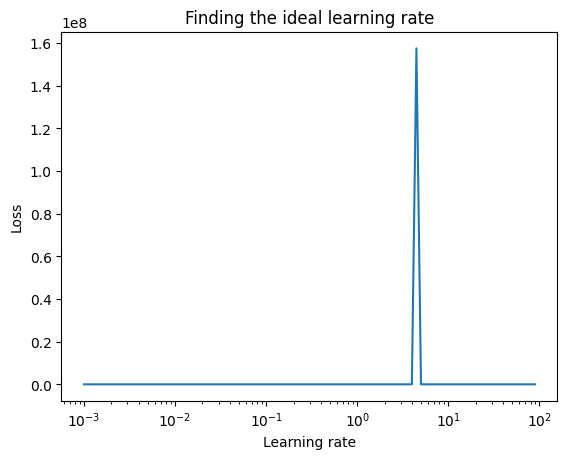

In [33]:
# Here we have plotted the graph for loss vs learning rate to find the optimum learning rate

plt.semilogx(result1.history["learning_rate"], result1.history["loss"]) 
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [35]:
# Now let us rebuild the model with perfect learning rate
 
# Step - 1. Set the Seed
tf.random.set_seed(42)

# Step - 2. Re-Building the Model with simple parameters
Multi_Class_Classifier2= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (32,32,3)),
    tf.keras.layers.Dense(3072 , activation = 'relu'),
    tf.keras.layers.Dense(1024,activation = 'relu'),
    tf.keras.layers.Dense(512,activation = 'relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')
])

# Step - 3. Compile the model
Multi_Class_Classifier2.compile(loss='sparse_categorical_crossentropy',
                                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
                                metrics = ["accuracy"])

# Step - 4. Training the model
result2 = Multi_Class_Classifier2.fit(train_data , 
                                      train_labels , 
                                      epochs = 100 , 
                                      validation_data = (test_data , test_labels))

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2316 - loss: 22.1524 - val_accuracy: 0.3060 - val_loss: 2.4604
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3220 - loss: 2.2362 - val_accuracy: 0.3372 - val_loss: 2.0081
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3581 - loss: 1.8767 - val_accuracy: 0.3374 - val_loss: 1.8458
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3780 - loss: 1.7673 - val_accuracy: 0.3920 - val_loss: 1.6956
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4025 - loss: 1.6912 - val_accuracy: 0.3858 - val_loss: 1.7132
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4103 - loss: 1.6397 - val_accuracy: 0.4127 - val_loss: 1.6699
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4298 - loss: 1.5948 - val_accuracy: 0.4268 - val_loss: 1.6178
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4467 - loss:

In [36]:
# Now let us evaluate the model

loss , accuracy = Multi_Class_Classifier2.evaluate(test_data , test_labels)
print(f"The Model has an accuracy {(accuracy*100):.2f}")
print(f"The Mdoel has a loss value of {loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4507 - loss: 7.1109
The Model has an accuracy 45.12
The Mdoel has a loss value of 7.175504684448242


From the above we can conclude that the above model do not work well in our task so we need to optimize it.

<Axes: title={'center': 'Accuracy graph'}, xlabel='Epoch', ylabel='Accuracy'>

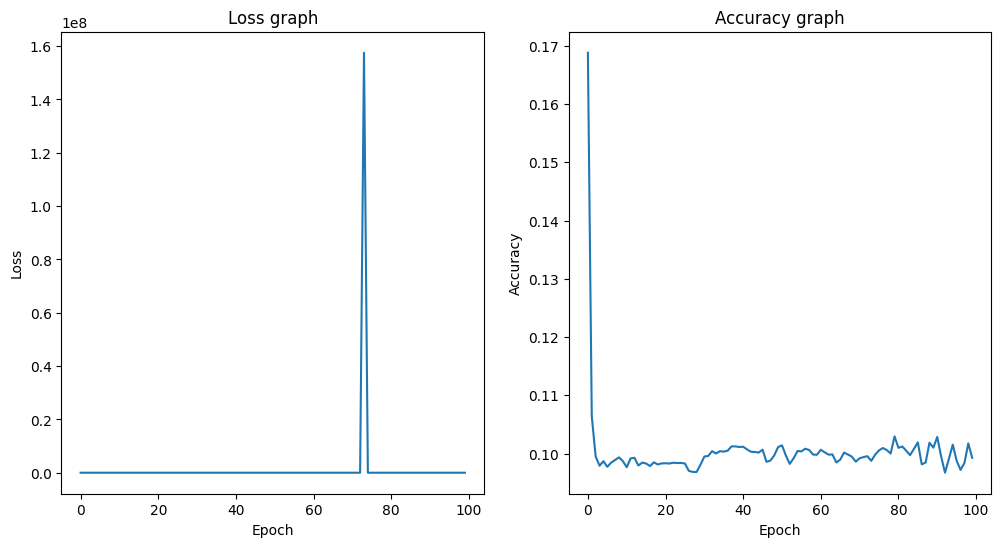

In [46]:
# Now let us plot the accurcy and loss graph 

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Loss graph")
plt.xlabel("Epoch")
plt.ylabel("Loss")
values['Loss'].plot()
plt.subplot(1,2,2)
plt.title("Accuracy graph")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
values['Accuracy'].plot()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


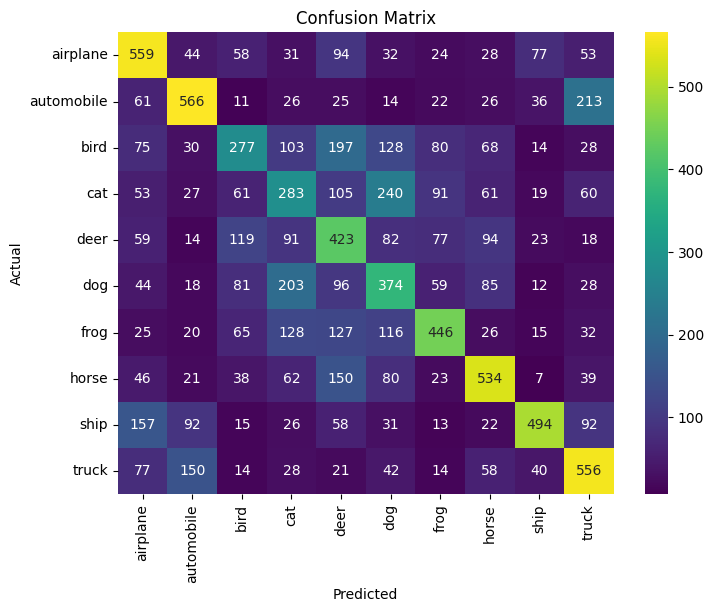

In [39]:
# Now let us plot the confusion matrix and end the session 

import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = Multi_Class_Classifier2.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)  

cm = confusion_matrix(test_labels, y_pred_classes)  

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap= "viridis",
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

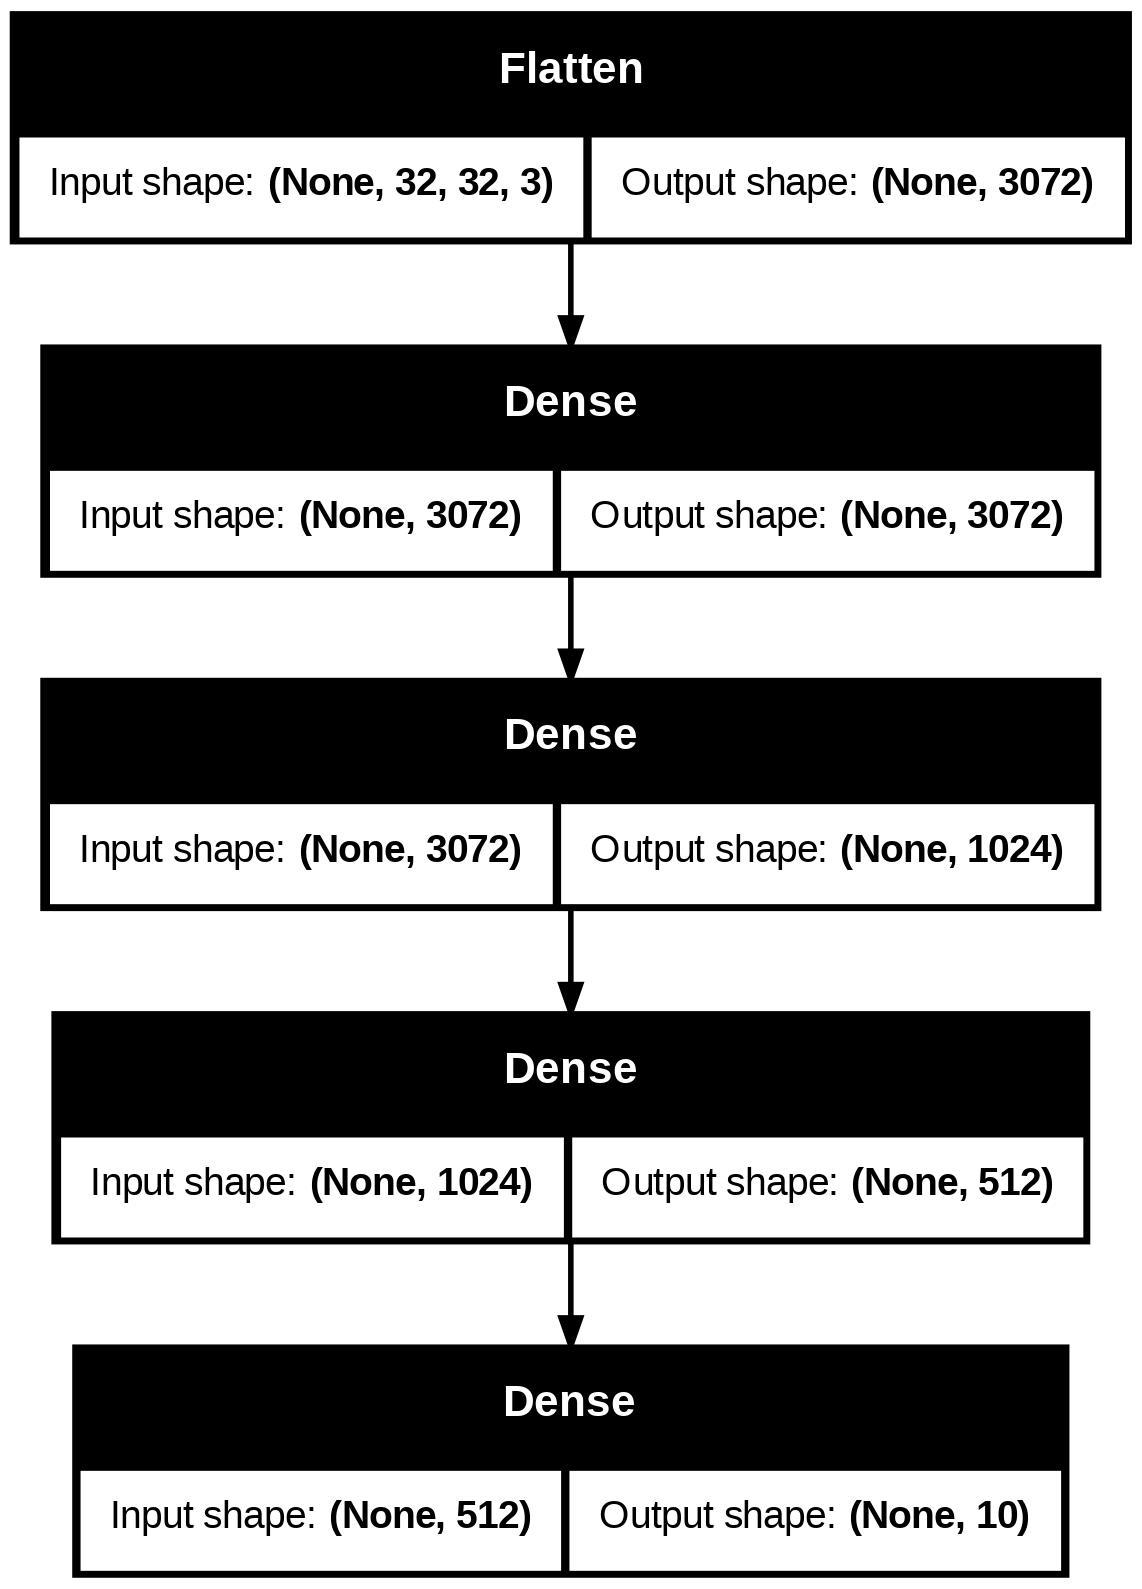

In [40]:
from tensorflow.keras.utils import plot_model

plot_model( Multi_Class_Classifier2, show_shapes = True)

In [43]:
# now let us save the weights

Multi_Class_Classifier2.save('multiclass_classifier.keras')  # entire model
Multi_Class_Classifier2.save_weights('multiclass_classifier_weights.weights.h5')  # only weights